In [199]:
import numpy as np
import pandas as pd

In [200]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [201]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [202]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [203]:
df.sample(5)

,target,text
5161,ham,Lol no. I just need to cash in my nitros. Hurr...
3886,ham,Cab is available.they pick up and drop at door...
1819,ham,Dunno dat's wat he told me. Ok lor...
5323,ham,Aah bless! How's your arm?
655,ham,Tell them the drug dealer's getting impatient


In [204]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [205]:
df['target']=encoder.fit_transform(df['target'])

In [206]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [207]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [208]:
df.duplicated().sum()

403

In [209]:
df=df.drop_duplicates(keep='first')

In [210]:
df.duplicated().sum()

0

In [211]:
df.shape

(5169, 2)

In [212]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

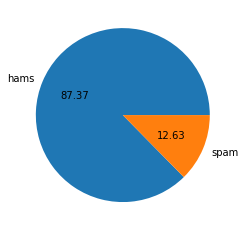

In [213]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['hams','spam'],autopct="%0.2f")
plt.show()

In [214]:
import nltk

In [215]:
df['num_charecters']=df['text'].apply(len)

In [216]:
df.head()

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [217]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [218]:
df.head()

,target,text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [219]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [220]:
df.head()

,target,text,num_charecters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [221]:
import seaborn as sns

<AxesSubplot:xlabel='num_charecters', ylabel='Count'>

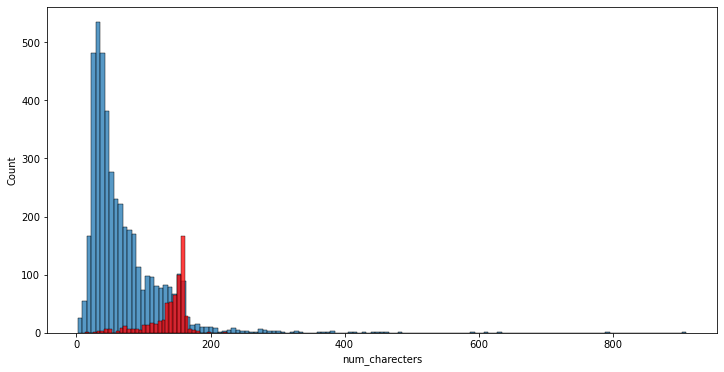

In [222]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_charecters'])
sns.histplot(df[df['target']==1]['num_charecters'],color='red')

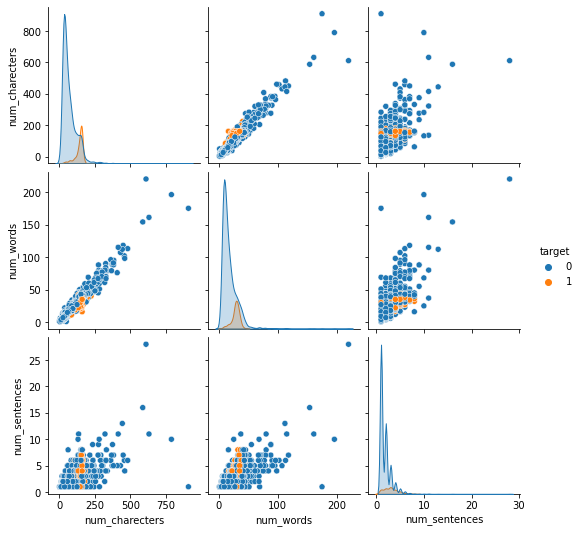

In [223]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

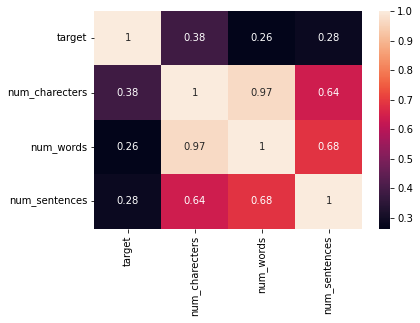

In [224]:
sns.heatmap(df.corr(),annot=True)

In [225]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords


In [226]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english'): 
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)            

In [227]:
transform_text('I Loved YT')

'love yt'

In [228]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [229]:
df['transformed_text']=df['text'].apply(transform_text)

In [230]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [231]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='White')

In [232]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

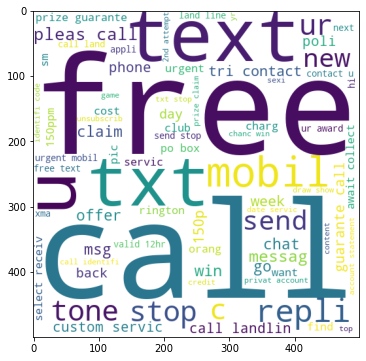

In [233]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [234]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

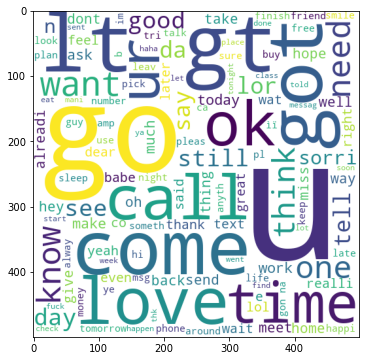

In [235]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [236]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
 for word in msg.split():
        spam_corpus.append(word)    

In [237]:
len(spam_corpus)

9939

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


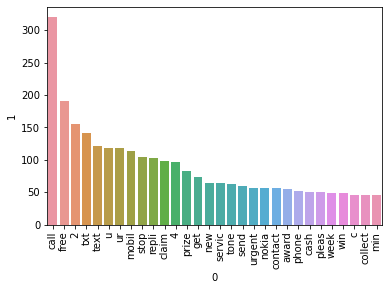

In [238]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [267]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf=TfidfVectorizer()
cv=CountVectorizer()

In [268]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [269]:
X.shape

(5169, 6708)

In [270]:
y=df['target'].values

In [271]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [272]:
from sklearn.model_selection import train_test_split

In [273]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [274]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [275]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [276]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [277]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [278]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [279]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))